# MFCCs for TouchDesigner
This is testing an MFCC implementation for TouchDesigner. Since there is no discrete Cosine Transform available in td, the inverse fourier transform method is used o obtain the cepstrum from the mel power spectrum.
this implementation is compared to the librosa implementation.


## references:
https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html    
http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

In [1]:
import matplotlib.pyplot as plt
import mfccLibNb as mf
import numpy as np
import librosa

x,sr = librosa.load('OSR_us_000_0010_8k.wav', mono=True, sr=None)
x = x/np.max(x) #normalize
lenS = 3.5
lenN = int(lenS*sr)
x = x[0:lenN]

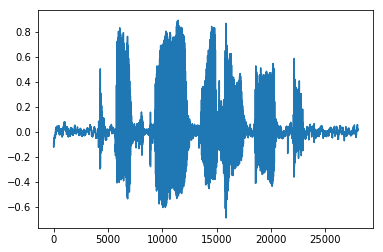

In [2]:
plt.plot(x)
plt.show()

In [3]:
def melFilterFreqBins(sr = 44100, nFilt=40, NFFT=512):
#     sample_rate = 8000
#     nfilt = 40
#     NFFT = 512
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sr / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nFilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bins = np.floor((NFFT + 1) * hz_points / sr)
    return list(bins)


In [4]:
frameSize = 1024
nFilters = 50


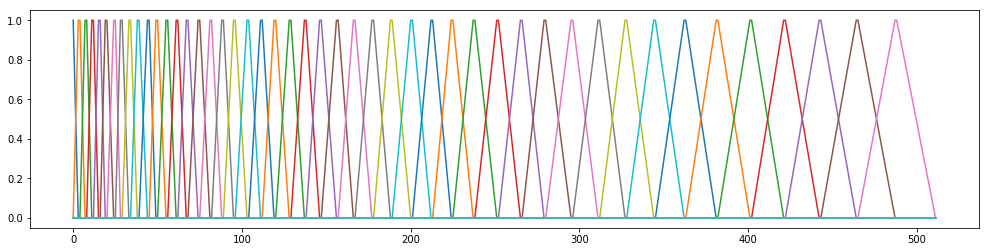

In [5]:
filters = mf.makeMelFilters(sr=sr, frameLength=frameSize, nFilters=nFilters)
plt.figure(figsize=[17,4])
plt.plot(filters)
plt.show()

In [6]:
def melFilterFreqBins(sr = 44100, nFilt=40, NFFT=512):
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sr / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nFilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bins = np.floor((NFFT + 1) * hz_points / sr)
    return bins


In [7]:
spec = mf.stft(x,frameSize=frameSize,windowFunction='hann',overlap=0)
spec = spec[:-1,:] #drop last value to make shape[0]==framesize/2

powSpec = mf.powerSpectrum(spec)

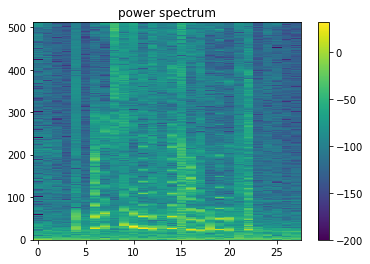

In [8]:
plt.imshow(mf.aToDb(powSpec), origin='lower',aspect='auto')
plt.colorbar()
plt.title('power spectrum')
plt.show()

In [9]:
filtered = np.dot(powSpec.T, filters).T

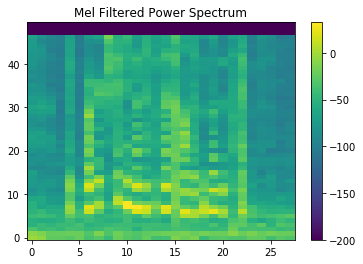

In [10]:
plt.imshow(mf.aToDb(filtered), origin='lower',aspect='auto')
plt.colorbar()
plt.title('Mel Filtered Power Spectrum')
plt.show()

In [11]:
logFiltered = np.log(filtered+np.finfo(float).eps)

In [12]:
ceps = np.zeros_like(logFiltered)
for i in range(logFiltered.shape[1]):
    ceps[:,i] = np.fft.irfft(logFiltered[:,i],len(logFiltered[:,i]))

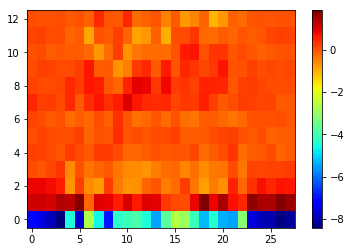

In [13]:
myMfcc = ceps[0:13,:]
plt.imshow(myMfcc, origin='lower', aspect='auto', cmap='jet')
plt.colorbar()
plt.show()

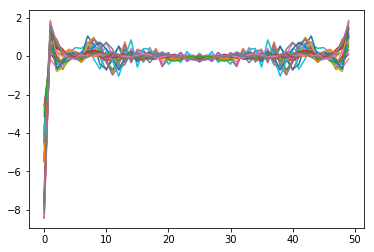

In [14]:
plt.plot(ceps)
plt.show()

## Comparison to librosa

In [15]:
mfcc = librosa.feature.mfcc(y=x,sr=sr,n_mfcc=13,n_fft=frameSize, hop_length=frameSize)

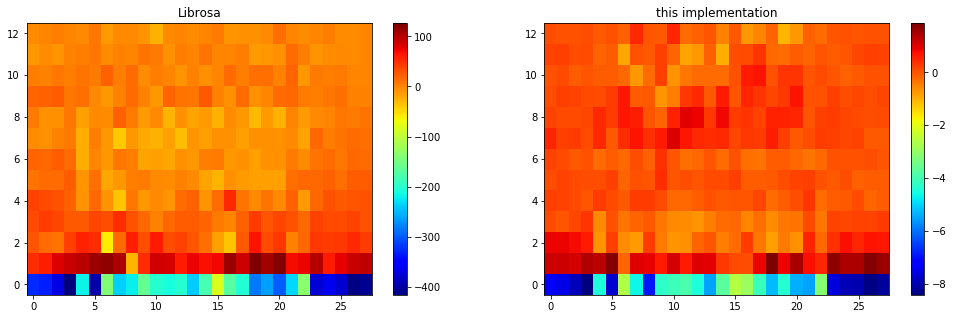

In [16]:
plt.figure(figsize=[17,5])
plt.subplot(121)
plt.imshow(mfcc, origin='lower', aspect='auto', cmap='jet')
plt.colorbar()
plt.title('Librosa')

plt.subplot(122)
plt.imshow(myMfcc, origin='lower', aspect='auto', cmap='jet')
plt.colorbar()
plt.title('this implementation')

plt.show()